# Practice for understanding image classification with neural network
- Single layer neural network with gradient descent

## 1) Import Packages

In [1]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math
import sklearn.metrics as metrics

## 2) Make Dataset

In [15]:
x_orig = []
y_orig = np.zeros((1,100))

for i in range(1,501):
    if i <= 100 :
        folder = 0
    elif i <=200 :
        folder = 1
    elif i <=300 :
        folder = 2
    elif i <=400 :
        folder = 3
    else :
        folder = 4

    img = np.array(Image.open('dataset/{0}/{1}.jpg'.format(folder,i)))

    img = Image.fromarray(img).convert('L') # gray
    data = img.resize((64,64))
    data = np.array(data)
    x_orig.append(data)

for i in range(1,5):
    y_orig = np.append(y_orig, np.full((1, 100),i), axis = 1)

In [16]:
x_orig = np.array(x_orig)
print(x_orig.shape)
print(y_orig.shape)

(500, 64, 64)
(1, 500)


In [17]:
# Random shuffle
s = np.arange(x_orig.shape[0])
np.random.shuffle(s)

x_shuffle = x_orig[s,:]
y_shuffle = y_orig[:,s]

print(x_shuffle.shape)
print(y_shuffle.shape)

(500, 64, 64)
(1, 500)


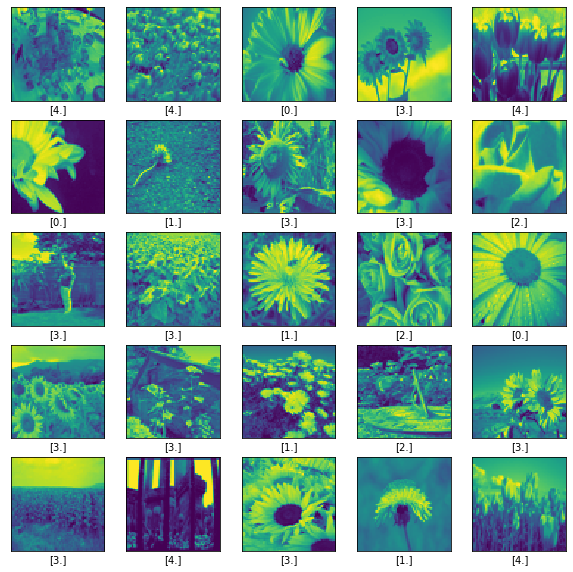

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_shuffle[i,:])
    plt.xlabel(y_shuffle[:,i])
plt.show()


In [18]:
# Split train and test datasets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_shuffle,y_shuffle.T, 
                                                                        test_size=0.2,  shuffle=True, random_state=1004)

In [20]:
print(x_train_orig.shape)
print (y_train_orig.shape)

(400, 64, 64)
(400, 1)


In [21]:
# Flatten the training and test images
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Normalize image vectors
x_train = x_train_flatten/255.
x_test = x_test_flatten/255.

# Convert training and test labels to one hot matrices
enc = OneHotEncoder()
y1 = y_train_orig.reshape(-1,1)
enc.fit(y1)
y_train = enc.transform(y1).toarray()
y_train = y_train.T

y2 = y_test_orig.reshape(-1,1)
enc.fit(y2)
y_test = enc.transform(y2).toarray()
y_test = y_test.T

# Explore dataset 
print ("number of training examples = " + str(x_train.shape[1]))
print ("number of test examples = " + str(x_test.shape[1]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 400
number of test examples = 100
x_train shape: (4096, 400)
y_train shape: (5, 400)
x_test shape: (4096, 100)
y_test shape: (5, 100)


## 3) Definie required functions

In [22]:
def initialize_parameters(nx, ny):
    """
    Argument:
        nx -- size of the input layer (4096)
        ny -- size of the output layer (3)
    
    Returns:
        W -- weight matrix of shape (ny, nx)
        b -- bias vector of shape (ny, 1)

    """   
    np.random.seed(1)

    W = np.random.randn(ny,nx)*0.01
    b = np.zeros((ny,1))

    assert(W.shape == (ny, nx))
    assert(b.shape == (ny, 1))

    
    return W, b

In [23]:
def softmax(Z):
    # compute the softmax activation
    
    S = np.exp(Z + np.max(Z)) / np.sum(np.exp(Z + np.max(Z)), axis = 0)
    
    return S

In [24]:
def classlabel(Z):
    # probabilities back into class labels
    y_hat = Z.argmax(axis=0)
    
    return y_hat

In [25]:
def propagate(W, b, X, Y):

    m = X.shape[1]
    
    # Forward Propagation
    Z = np.dot(W, X)+ b
    A = softmax(Z)     # compute activation
    
    cost = (-1/m) * np.sum(Y * np.log(A)) # compute cost (Cross_entropy)
    
    # Backward propagation
    dW = (1/m) * (np.dot(X,(A-Y).T)).T
    db = (1/m) * (np.sum(A-Y))
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

## 4) Single-Layer Neural Network with Gradient Descent

In [28]:
def optimize(X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    W, b = initialize_parameters(4096,5)
    for i in range(num_iterations):

        grads, cost = propagate(W,b,X,Y)

        dW = grads["dW"]
        db = grads["db"]
        
        W = W - (learning_rate) * dW
        b = b - (learning_rate) * db

        # Record the costs for plotting
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 200)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Lets save the trainded parameters in a variable
    params = {"W": W,
              "b": b}    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

Cost after iteration 0: 1.653155
Cost after iteration 200: 1.214646
Cost after iteration 400: 1.045510
Cost after iteration 600: 0.923308
Cost after iteration 800: 0.827790


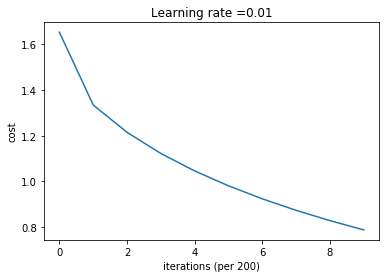

W = [[ 0.00274814 -0.01450864 -0.00974322 ...  0.00093526  0.01911327
   0.02294064]
 [-0.00927346  0.0216745   0.01314547 ... -0.00432205  0.01272403
  -0.00400755]
 [ 0.00616511  0.03962933  0.01073167 ...  0.00724677 -0.00946024
   0.02890804]
 [ 0.01085163  0.02048763  0.01829543 ... -0.02597101  0.01027772
  -0.00620276]
 [ 0.00437818 -0.02390017 -0.0324942  ... -0.03758692 -0.03652832
  -0.02126145]]
b = [[4.74065232e-18]
 [4.74065232e-18]
 [4.74065232e-18]
 [4.74065232e-18]
 [4.74065232e-18]]


In [32]:
params, grads, costs = optimize(x_train, y_train, num_iterations= 1000, learning_rate = 0.01, print_cost = True)

print ("W = " + str(params["W"]))
print ("b = " + str(params["b"]))

## 5) Accuracy Analysis

In [33]:
def predict(W, b, X) :

    m = X.shape[1]
    
    # Compute "A" predicting the probabilities
    Z = np.dot(W, X)+ b
    A = softmax(Z) 

    # Convert probabilities A to actual predictions
    y_prediction = A.argmax(axis=0)
    
    
    return y_prediction

In [35]:
# Predict test/train set
W1 = params['W']
b1 = params['b']

y_prediction_train = predict(W1, b1, x_train)
y_prediction_test = predict(W1, b1, x_test)
print(y_prediction_train)
print(y_prediction_test)

# Print train/test accuracy
print("train accuracy : ", metrics.accuracy_score(y_prediction_train, y_train_orig))
print("test accuracy : ", metrics.accuracy_score(y_prediction_test, y_test_orig))

[2 1 2 4 4 1 3 0 0 3 4 0 4 1 2 0 1 0 3 2 3 3 1 4 4 2 1 1 4 0 2 1 3 1 4 2 3
 2 2 2 2 3 3 2 3 0 3 0 0 0 3 2 0 4 2 2 4 2 3 0 2 2 0 4 2 2 1 2 3 2 4 0 4 3
 4 4 1 2 2 0 3 2 0 0 0 1 3 3 0 2 2 4 3 3 2 1 0 0 1 3 4 0 0 0 1 0 0 1 2 4 4
 0 1 0 2 0 4 3 3 0 0 1 2 2 4 0 0 4 2 3 2 0 3 3 1 2 1 1 1 0 1 0 3 2 4 2 2 0
 1 3 4 1 0 1 4 4 2 3 2 1 0 3 4 3 0 0 4 3 4 4 0 4 0 0 2 2 1 2 2 2 1 4 1 4 3
 1 3 3 2 4 4 0 2 3 4 1 4 4 3 3 2 4 4 1 4 1 3 2 3 2 3 1 0 2 0 2 0 4 1 4 2 3
 4 2 0 3 3 3 0 4 1 3 4 0 3 4 2 0 2 4 0 2 0 0 0 4 1 2 1 4 1 1 2 3 1 3 1 1 1
 3 4 2 1 3 3 4 1 4 4 4 2 1 3 1 4 0 1 2 0 3 4 2 1 2 3 1 3 2 3 0 3 1 3 3 1 2
 0 4 4 2 4 4 0 3 3 3 0 2 0 4 3 1 0 4 2 3 0 0 1 3 0 4 3 3 2 2 3 1 0 0 4 4 3
 0 2 2 1 3 2 4 3 0 1 2 1 4 1 0 4 0 2 4 2 1 1 3 3 0 2 3 4 3 3 4 2 1 3 0 1 0
 1 4 0 3 3 0 4 0 1 0 4 0 4 4 2 3 4 0 1 4 0 0 3 1 3 2 3 3 3 3]
[2 0 1 3 2 4 4 4 0 0 3 3 3 1 3 4 3 0 0 2 4 2 0 1 3 2 1 2 4 0 1 4 0 3 3 2 0
 1 3 2 0 1 3 3 3 2 0 3 4 0 3 3 3 4 2 3 0 1 0 4 2 3 0 1 4 0 1 2 3 3 2 1 3 2
 4 1 4 4 4 3 0 1 0 0 3 2 1 1 3 4 0 2 4